Basic eda

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('https://raw.githubusercontent.com/saptarshihalder/Brain-Tumor-Detection/refs/heads/main/TCGA_InfoWithGrade.csv')

# Display the first 5 rows
print(df.head())

# Check data structure and types
print(df.info())

# Summary statistics for numerical columns
print(df.describe())


   Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0      0       0             51.30     0     1     0     0     0     0    0   
1      0       0             38.72     0     1     0     0     0     0    1   
2      0       0             35.17     0     1     1     1     0     0    0   
3      0       1             32.78     0     1     1     1     0     0    0   
4      0       0             31.51     0     1     1     1     0     0    0   

   ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
0  ...      1    0       0     0      0        0       0     0     0       0  
1  ...      0    0       0     0      0        0       0     0     0       0  
2  ...      0    0       0     0      0        0       0     0     0       0  
3  ...      0    0       0     0      0        0       0     0     1       0  
4  ...      0    0       0     0      0        0       0     0     0       0  

[5 rows x 24 columns]
<class 'pandas.core.frame.Da

Checking for missing values although not required

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64


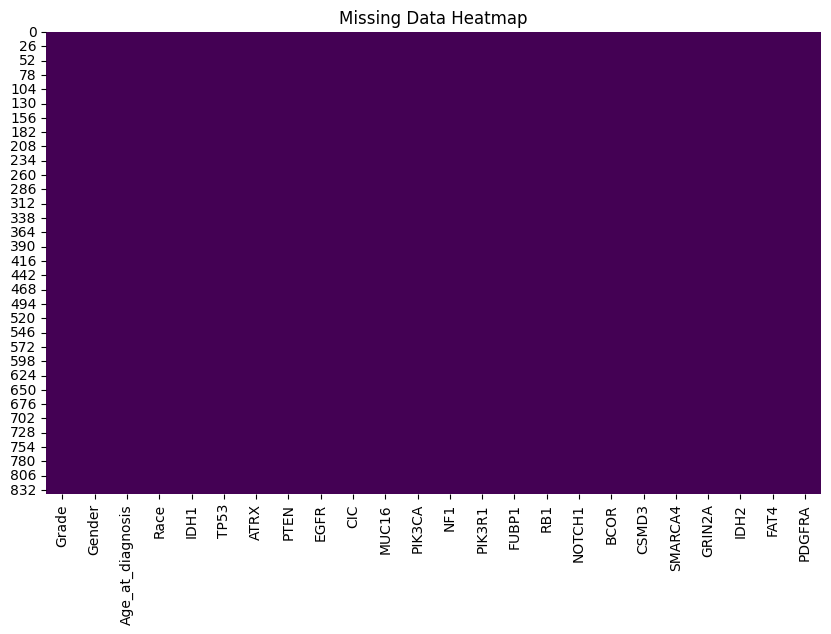

In [ ]:
# Count missing values in each column
print(df.isnull().sum())

# Visualize missing data as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


Target variable distribution

In [ ]:
# Replace 'target_column' with your target variable name
if 'Grade' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Grade', data=df)
    plt.title('Target Variable Distribution')
    plt.show()


Feature Selection...Mutual info classifier

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

print("Features ranked by Mutual Information:")
print(mi_scores_df.head(10))


Features ranked by Mutual Information:
             Feature  Mutual Information
3               IDH1            0.290849
1   Age_at_diagnosis            0.183376
6               PTEN            0.087134
5               ATRX            0.047467
17             CSMD3            0.043703
8                CIC            0.041005
7               EGFR            0.028499
9              MUC16            0.025543
10            PIK3CA            0.019188
18           SMARCA4            0.018015


XGB CLASSIFIER

In [ ]:
from xgboost import XGBClassifier
importances = pd.DataFrame()

# Train an XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X, y)

# Get feature importances
importances['Feature'] = X.columns
importances['Importance'] = xgb.feature_importances_
importances = importances.sort_values(by='Importance', ascending=False)

print("Top 10 features by XGBoost Importance:")
print(importances.head(10))


Top 10 features by XGBoost Importance:
   Feature  Importance
3     IDH1    0.545846
20    IDH2    0.171367
15  NOTCH1    0.051641
10  PIK3CA    0.023177
4     TP53    0.019237
11     NF1    0.018595
14     RB1    0.016649
19  GRIN2A    0.015167
17   CSMD3    0.013654
9    MUC16    0.013570


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:39:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


PCA( NOT REQUIRED)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the CSV file
url = 'https://raw.githubusercontent.com/saptarshihalder/Brain-Tumor-Detection/refs/heads/main/TCGA_InfoWithGrade.csv'
df = pd.read_csv(url)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing numerical values with median
num_imputer = SimpleImputer(strategy='median')
X_numerical = num_imputer.fit_transform(df[numerical_cols])

# One-hot encode categorical columns
cat_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical = cat_encoder.fit_transform(df[categorical_cols])
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)

# Combine numerical and categorical features
X_encoded = np.hstack([X_numerical, X_categorical])
feature_names = list(numerical_cols) + list(cat_feature_names)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Calculate and rank feature contributions
components = pd.DataFrame(np.abs(pca.components_), columns=feature_names)
feature_contributions = components.sum()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Contribution': feature_contributions
}).sort_values(by='Contribution', ascending=False)

# Print results
print("Feature Importance Based on PCA Contributions:")
print(importance_df.head(10))

print("\nExplained Variance by Each Principal Component:")
print(pca.explained_variance_ratio_)

print(f"\nNumber of components retaining 95% variance: {X_pca.shape[1]}")

Feature Importance Based on PCA Contributions:
         Feature  Contribution
BCOR        BCOR      4.041834
SMARCA4  SMARCA4      4.010893
PDGFRA    PDGFRA      3.864242
MUC16      MUC16      3.763308
EGFR        EGFR      3.738748
GRIN2A    GRIN2A      3.728860
RB1          RB1      3.719820
PIK3R1    PIK3R1      3.640450
NF1          NF1      3.564078
PTEN        PTEN      3.556433

Explained Variance by Each Principal Component:
[0.1403082  0.08524671 0.07382106 0.04868028 0.04829082 0.04751174
 0.0446341  0.04303877 0.04140767 0.0408318  0.04036465 0.0382137
 0.03574469 0.03397066 0.03354427 0.03274068 0.03140084 0.02849988
 0.02749025 0.02534106 0.01904804]

Number of components retaining 95% variance: 21


CHI SQUARED CLASSIFIER

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

# Load the CSV file
url = 'https://raw.githubusercontent.com/saptarshihalder/Brain-Tumor-Detection/refs/heads/main/TCGA_InfoWithGrade.csv'
X = pd.read_csv(url)

# Separate features and target
y = X['Grade']
X_positive = X.drop('Grade', axis=1)

# Ensure there are no negative values, this is important for chi2
X_positive = X_positive - X_positive.min(axis=0)

# Apply SelectKBest with Chi-squared test
chi2_selector = SelectKBest(chi2, k=20)  # Select top 20 features
X_chi2 = chi2_selector.fit_transform(X_positive, y)

# Print the selected features
selected_features_chi2 = X_positive.columns[chi2_selector.get_support()]
print(f"Selected Features by Chi-Squared Test: {selected_features_chi2}")

Selected Features by Chi-Squared Test: Index(['Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN',
       'EGFR', 'CIC', 'MUC16', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'PDGFRA'],
      dtype='object')


RFE CLASSIFIER

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Example dataset
# Assuming df is your DataFrame with features and 'target' is your target variable
df = pd.read_csv('https://raw.githubusercontent.com/saptarshihalder/Brain-Tumor-Detection/refs/heads/main/TCGA_InfoWithGrade.csv')

# Split the dataset into features (X) and target (y)
X = df.drop('Grade', axis=1)  # Features
y = df['Grade']  # Target variable

# Normalize the 'Age_at_diagnosis' feature
scaler = StandardScaler()
X['Age_at_diagnosis'] = scaler.fit_transform(X[['Age_at_diagnosis']])

# Initialize a logistic regression model (or another model of your choice)
model = LogisticRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=20)  # Adjust the number of features to select
X_rfe = rfe.fit_transform(X, y)

# Get the ranking of features (1 is selected)
selected_features = X.columns[rfe.support_]
print(f"Selected features: {selected_features}")

# Optionally, you can print the ranking of all features
print("Feature ranking:", rfe.ranking_)


Selected features: Index(['Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'PDGFRA'],
      dtype='object')
Feature ranking: [1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1]


FEATURE SELECTION THROUGH RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

# Example dataset
# Assuming df is your DataFrame with features and 'target' is your target variable
df = pd.read_csv('https://raw.githubusercontent.com/saptarshihalder/Brain-Tumor-Detection/refs/heads/main/TCGA_InfoWithGrade.csv')

# Split the dataset into features (X) and target (y)
X = df.drop('Grade', axis=1)  # Features
y = df['Grade']  # Target variable

# Normalize the 'Age_at_diagnosis' feature
scaler = StandardScaler()
X['Age_at_diagnosis'] = scaler.fit_transform(X[['Age_at_diagnosis']])

# Initialize a Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the Random Forest model to the data
rf.fit(X, y)

# Get feature importances from the Random Forest
feature_importances = rf.feature_importances_

# Create a DataFrame to view feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_df)

# Select features based on importance using SelectFromModel
selector = SelectFromModel(rf, prefit=True, threshold='mean')  # Select features above the mean importance
X_selected = selector.transform(X)

# Get the names of selected features
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")


Feature Importances:
             Feature  Importance
1   Age_at_diagnosis    0.334547
3               IDH1    0.278056
8                CIC    0.045360
6               PTEN    0.045134
5               ATRX    0.042984
7               EGFR    0.029021
2               Race    0.027489
20              IDH2    0.026712
4               TP53    0.024161
0             Gender    0.021933
10            PIK3CA    0.014957
11               NF1    0.014873
14               RB1    0.013586
9              MUC16    0.013484
15            NOTCH1    0.012417
12            PIK3R1    0.011212
13             FUBP1    0.010104
22            PDGFRA    0.007267
19            GRIN2A    0.006583
21              FAT4    0.006452
16              BCOR    0.006051
17             CSMD3    0.004258
18           SMARCA4    0.003361
Selected Features: ['Age_at_diagnosis', 'IDH1', 'PTEN', 'CIC']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



TRAINING RANDOM FOREST, KNN, LOGISTIC REGRESSION AND SVM INDIVIDUALLY USING PIPELINE BASED ON THE BEST 20 FEATURES SELECTED THROUGH FEATURE SELECTION TECHNIQUES OUT OF 23 TO IMPROVE MODEL PERFORMANCE

Training Random Forest...

Pipeline for Random Forest:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Age_at_diagnosis'])])),
                ('model', RandomForestClassifier(random_state=42))]) 

Best Parameters for Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Cross-validated Accuracy: 0.8718
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        89
           1       0.81      0.91      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.86      0.86      0.86       168



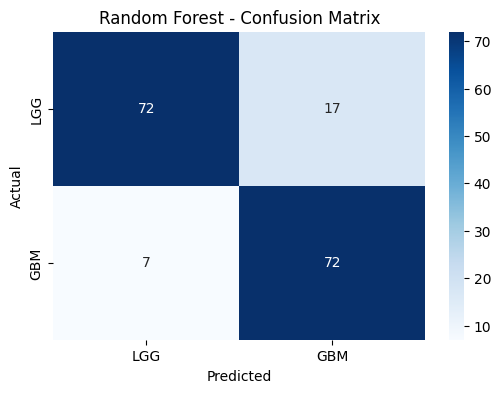

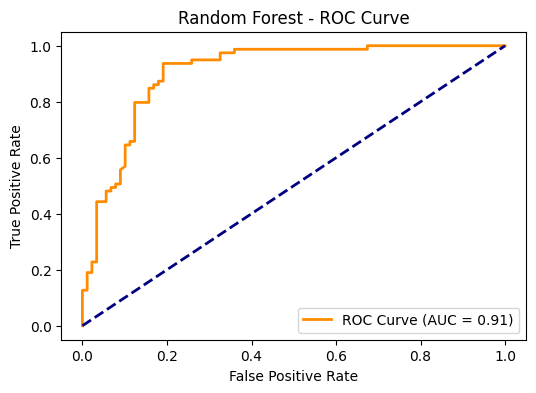

--------------------------------------------------
Training Logistic Regression...

Pipeline for Logistic Regression:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Age_at_diagnosis'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))]) 

Best Parameters for Logistic Regression: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Cross-validated Accuracy: 0.8778
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        89
           1       0.82      0.92      0.87        79

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.88      0.87      0.87       168



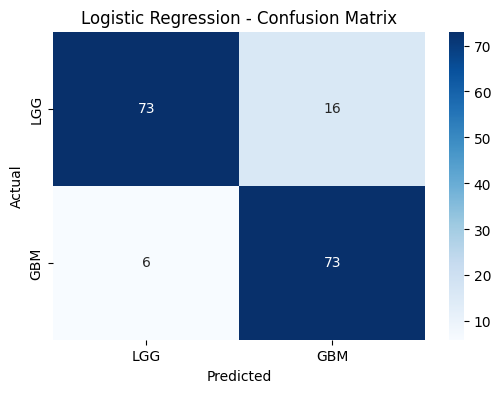

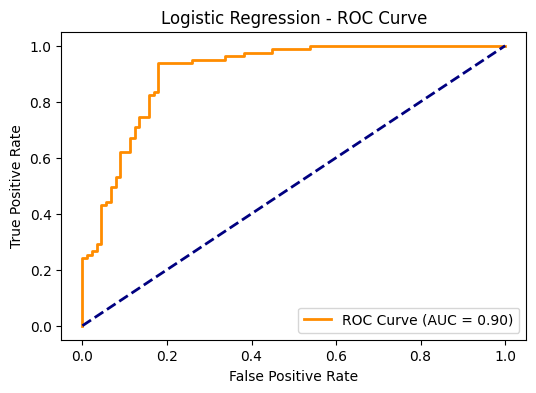

--------------------------------------------------
Training KNN...

Pipeline for KNN:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Age_at_diagnosis'])])),
                ('model', KNeighborsClassifier())]) 

Best Parameters for KNN: {'model__metric': 'euclidean', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
Cross-validated Accuracy: 0.8658
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        89
           1       0.83      0.91      0.87        79

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.87      0.87      0.87       168



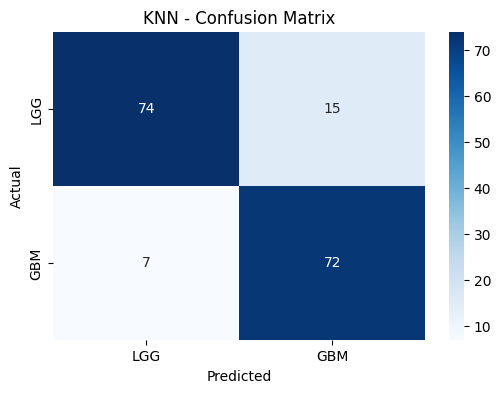

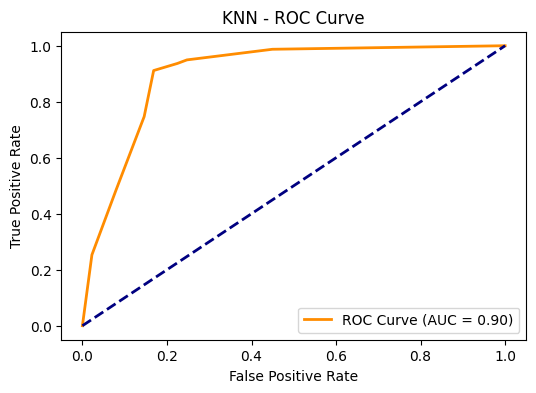

--------------------------------------------------
Training SVM...

Pipeline for SVM:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Age_at_diagnosis'])])),
                ('model', SVC(probability=True, random_state=42))]) 

Best Parameters for SVM: {'model__C': 10, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Cross-validated Accuracy: 0.8778
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        89
           1       0.81      0.94      0.87        79

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.88      0.87      0.87       168



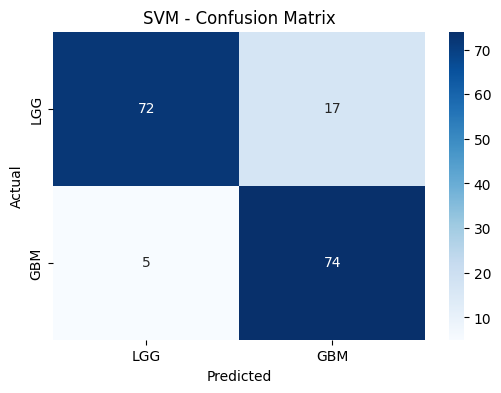

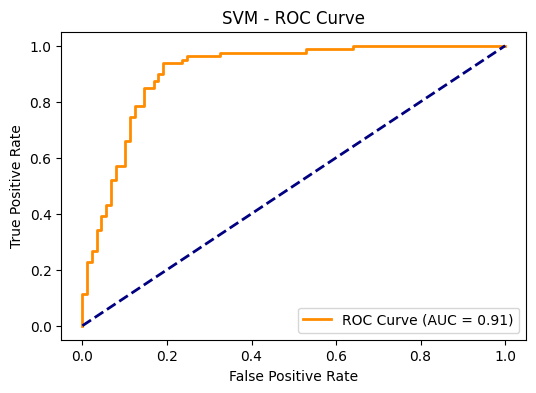

--------------------------------------------------
Summary of Best Results:
Random Forest - Best Cross-validated Accuracy: 0.8718
Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
--------------------------------------------------
Logistic Regression - Best Cross-validated Accuracy: 0.8778
Best Parameters: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
--------------------------------------------------
KNN - Best Cross-validated Accuracy: 0.8658
Best Parameters: {'model__metric': 'euclidean', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
--------------------------------------------------
SVM - Best Cross-validated Accuracy: 0.8778
Best Parameters: {'model__C': 10, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
--------------------------------------------------


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset
# Assuming df is your DataFrame with features and 'target' is your target variable
df = pd.read_csv('https://raw.githubusercontent.com/saptarshihalder/Brain-Tumor-Detection/refs/heads/main/TCGA_InfoWithGrade.csv')

# Drop features that do not affect the target variable much
irrelevant_features = ['FAT4', 'BCOR', 'SMARCA4']
X = df.drop(columns=irrelevant_features + ['Grade'])
y = df['Grade']

# Identify ordinal and continuous features
ordinal_features = X.columns.difference(['Age_at_diagnosis'])  # All except Age_at_diagnosis
continuous_features = ['Age_at_diagnosis']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), continuous_features)  # Only scale Age_at_diagnosis
    ],
    remainder='passthrough'  # Leave other features as is
)

# Define a dictionary of models and their hyperparameter grids
models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs', 'liblinear']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__gamma': ['scale', 'auto']
        }
    }
}

# Loop through models, perform GridSearchCV, and evaluate performance
results = {}
for model_name, model_info in models.items():
    print(f"Training {model_name}...\n")

    # Define a pipeline for each model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Apply the column transformer
        ('model', model_info['model'])   # Add the model
    ])

    print(f"Pipeline for {model_name}:")
    print(pipeline, "\n")

    # Define GridSearchCV with the model's hyperparameter grid
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info['params'],
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1
    )

    # Fit GridSearchCV
    grid.fit(X_train, y_train)

    # Save the best model and results
    results[model_name] = {
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'model': grid.best_estimator_
    }

    # Evaluate on the test set
    y_pred = grid.best_estimator_.predict(X_test)
    y_prob = grid.best_estimator_.predict_proba(X_test)[:, 1] if hasattr(grid.best_estimator_, 'predict_proba') else None

    print(f"Best Parameters for {model_name}: {grid.best_params_}")
    print(f"Cross-validated Accuracy: {grid.best_score_:.4f}")
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['LGG', 'GBM'], yticklabels=['LGG', 'GBM'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f"{model_name} - ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

    print("-" * 50)

# Summarize results
print("Summary of Best Results:")
for model_name, result in results.items():
    print(f"{model_name} - Best Cross-validated Accuracy: {result['best_score']:.4f}")
    print(f"Best Parameters: {result['best_params']}")
    print("-" * 50)


IMPLEMENTING A NEW TECHNIQUE CALLED ENSEMBLE  LEARNING( STACKING) ON SELECTED FEATURES FOR BETTER PERFORMANCE

Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.94      0.82      0.87        89
           1       0.82      0.94      0.88        79

    accuracy                           0.88       168
   macro avg       0.88      0.88      0.87       168
weighted avg       0.88      0.88      0.87       168



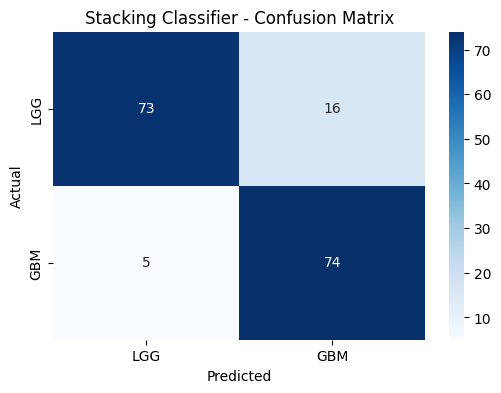

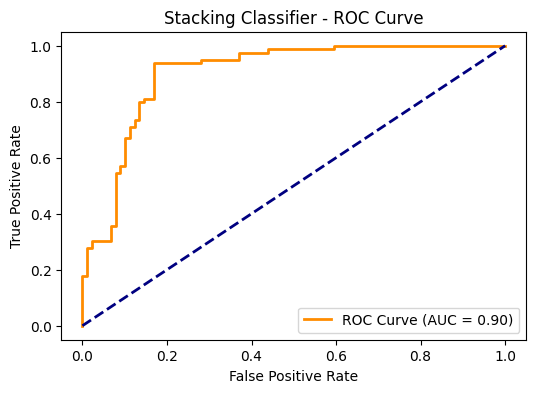

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/saptarshihalder/Brain-Tumor-Detection/refs/heads/main/TCGA_InfoWithGrade.csv')

# Drop features that do not affect the target variable much
irrelevant_features = ['FAT4', 'BCOR', 'SMARCA4']
X = df.drop(columns=irrelevant_features + ['Grade'])
y = df['Grade']

# Identify ordinal and continuous features
ordinal_features = X.columns.difference(['Age_at_diagnosis'])  # All except Age_at_diagnosis
continuous_features = ['Age_at_diagnosis']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[('scale', StandardScaler(), continuous_features)],  # Only scale Age_at_diagnosis
    remainder='passthrough'  # Leave other features as is
)

# Base models for stacking
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('logistic_regression', LogisticRegression(C=1, max_iter=1000, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(C=1, kernel='linear', probability=True, random_state=42))
]

# Meta-model (Logistic Regression used as default)
meta_model = LogisticRegression(random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # 5-fold cross-validation for meta-model training
    n_jobs=-1
)

# Create a pipeline with preprocessor and stacking classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking_clf', stacking_clf)
])

# Train the stacking model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # For ROC curve

# Print classification report
print("Classification Report for Stacking Classifier:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['LGG', 'GBM'], yticklabels=['LGG', 'GBM'])
plt.title("Stacking Classifier - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Stacking Classifier - ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/saptarshihalder/Brain-Tumor-Detection/refs/heads/main/TCGA_GBM_LGG_Mutations_all.csv')

# 1. Age-related Distribution (Interactive Strip Plot)
fig1 = px.strip(
    data,
    x='Primary_Diagnosis',
    y='Age_at_diagnosis',
    color='Grade',
    title='Age Distribution by Primary Diagnosis',
    hover_data=['Gender', 'Primary_Diagnosis'],
    stripmode='group'  # Group mode to separate data by grade
)

# Customize the layout
fig1.update_layout(
    xaxis_title='Primary Diagnosis',
    yaxis_title='Age at Diagnosis',
    legend_title='Tumor Grade',
    xaxis=dict(tickangle=45)  # Rotate x-axis labels for readability
)

# Show the plot
fig1.show()


# 2. Tumor vs. Primary Diagnosis Distribution (Count Bar Plot)
fig2 = px.bar(
    data,
    x='Primary_Diagnosis',
    color='Grade',
    title='Tumor Type Distribution by Primary Diagnosis',
    barmode='group',
    hover_data=['Gender', 'Age_at_diagnosis'],  # Additional hover data
    labels={'count': 'Tumor Count'},
    height=600
)
fig2.update_layout(
    xaxis_title='Primary Diagnosis',
    yaxis_title='Count',
    legend_title='Tumor Grade',
    xaxis=dict(tickangle=45)  # Rotate x-axis labels
)

# Show the plot
fig2.show()


# 3. Gender Distribution of Brain Tumors (Pie Chart)
gender_distribution = data['Gender'].value_counts().reset_index()
gender_distribution.columns = ['Gender', 'Count']

fig3 = px.bar(
    gender_distribution,
    x='Gender',
    y='Count',
    title='Gender Distribution of Brain Tumors',
    color='Gender',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig3.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count',
    height=500
)

# Show the plot
fig3.show()
